In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering


In [2]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


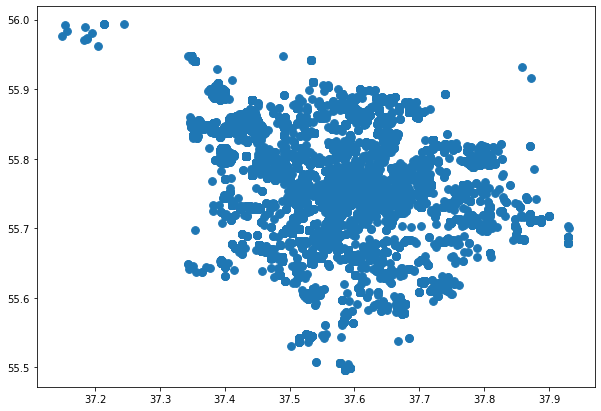

In [3]:
#посмотрим на данные
plt.figure(figsize=[10,7])
plt.scatter(data.x, data.y, cmap='autumn', s=60)

In [4]:
from sklearn.preprocessing import StandardScaler
X = data[['x', 'y']]
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [5]:
#найдем оптимальное количество кластеров для задачи разделения города без учета голосов
k_inertia = []

ks = range(2,10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled_X)
    k_inertia.append(clf_kmeans.inertia_)   
    

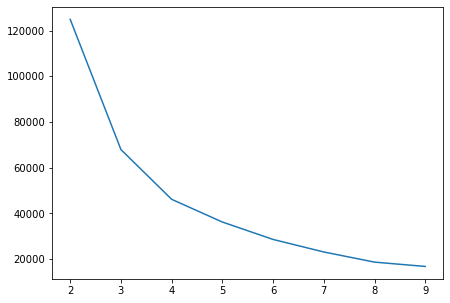

In [6]:
#попробуем определить оптимальное число кластеров методом локтя
plt.figure(figsize=[7,5])
plt.plot(ks, k_inertia)

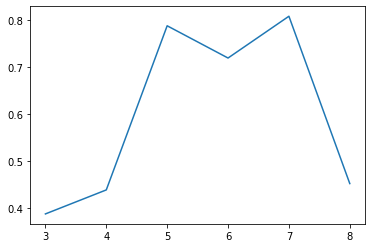

In [7]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

plt.figure(figsize=[7,5])
plt.plot(ks[1:-1], diff_r)

In [9]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

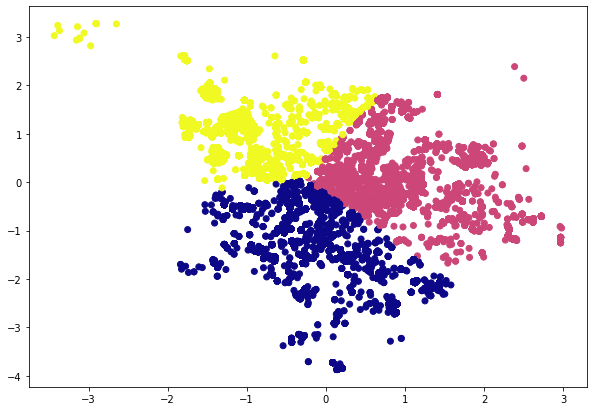

In [23]:
#теперь построим кластеризацию, учитывая полученное значение 

clf_kmeans = KMeans(n_clusters=3)
clusters_kmeans = clf_kmeans.fit_predict(scaled_X)

plt.figure(figsize=[10,7])
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clf_kmeans.labels_, cmap='plasma') 

In [53]:
#выбираем и подготавливаем данные с голосами "да"

data_yes = data.loc[data['comment_class'] == 1]
X_yes = data_yes[['x', 'y']]
scaler = StandardScaler()
scaled_X_yes = scaler.fit_transform(X_yes)

In [48]:
#определяем количество кластеров для новой задачи
k_inertia1 = []
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled_X_yes)
    k_inertia1.append(clf_kmeans.inertia_)
    
diff1 = np.diff(k_inertia1)
diff_r1 = diff1[1:] / diff1[:-1]
k_opt1 = ks[np.argmin(diff_r1)+1]
k_opt1

3

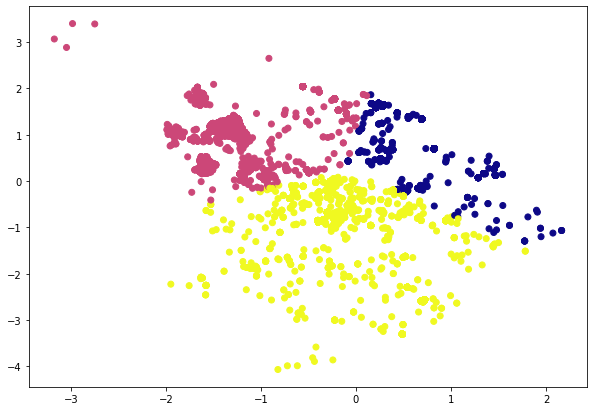

In [49]:
#строим модель кластеризации 
clf_kmeans = KMeans(n_clusters=3)
clusters_kmeans1 = clf_kmeans.fit_predict(scaled_X_yes)

plt.figure(figsize=[10,7])
plt.scatter(scaled_X_yes[:, 0], scaled_X_yes[:, 1], c = clf_kmeans.labels_, cmap='plasma') 

In [52]:
#выбираем и подготавливаем данные с голосами "нет"
data_no = data.loc[data['comment_class'] == -1]
X_no = data_no[['x', 'y']]
scaler = StandardScaler()
scaled_X_no = scaler.fit_transform(X_no)

In [50]:
# еще раз определяем количество кластеров
k_inertia2 = []
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans2 = clf_kmeans.fit_predict(scaled_X_no)
    k_inertia2.append(clf_kmeans.inertia_)
    
diff2 = np.diff(k_inertia2)
diff_r2 = diff2[1:] / diff2[:-1]
k_opt2 = ks[np.argmin(diff_r2)+1]
k_opt2

3

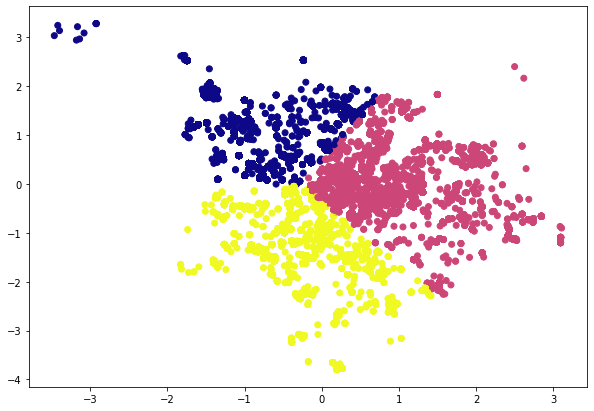

In [51]:
#строим модель кластеризации 
clf_kmeans = KMeans(n_clusters=3)
clusters_kmeans2 = clf_kmeans.fit_predict(scaled_X_no)

plt.figure(figsize=[10,7])
plt.scatter(scaled_X_no[:, 0], scaled_X_no[:, 1], c = clf_kmeans.labels_, cmap='plasma') 